In [3]:
import pandas as pd
import glob

# Procesamiento de datos

In [4]:
resultados=pd.read_csv("data/gpt3_salida/resultados.csv")
resultados

,Unnamed: 0,0,1
0,0,data/gpt3/2/paraphraseGPT2.csv,"[0.5013659324260117, 0.9826589595375722]"
1,1,data/gpt3/3/Originales.csv,"[1.2629032713829438, 0.011560693641618497]"
2,2,data/gpt3/1/paraphraseGPT3.csv,"[1.0866086128130124, 0.38728323751102295]"


In [5]:
resultados=resultados.assign(grupo=0.0)
resultados=resultados.assign(error=0.0)
resultados=resultados.assign(accuracy=0.0)

In [6]:
resultados

,Unnamed: 0,0,1,grupo,error,accuracy
0,0,data/gpt3/2/paraphraseGPT2.csv,"[0.5013659324260117, 0.9826589595375722]",0.0,0.0,0.0
1,1,data/gpt3/3/Originales.csv,"[1.2629032713829438, 0.011560693641618497]",0.0,0.0,0.0
2,2,data/gpt3/1/paraphraseGPT3.csv,"[1.0866086128130124, 0.38728323751102295]",0.0,0.0,0.0


In [9]:
temp=resultados.copy()
grupos=["GPT2","Originales","GPT3"]
i=0
for index,strings in temp.iterrows():
    resultados.at[index,'grupo']=grupos[i]
    resultados.at[index,'error']=float(strings[2].split(',')[0][1:])
    resultados.at[index,'accuracy']=float(strings[2].split(',')[1][:-1])
    i+=1
resultados

,Unnamed: 0,0,1,grupo,error,accuracy
0,0,data/gpt3/2/paraphraseGPT2.csv,"[0.5013659324260117, 0.9826589595375722]",GPT2,0.501366,0.982659
1,1,data/gpt3/3/Originales.csv,"[1.2629032713829438, 0.011560693641618497]",Originales,1.262903,0.011561
2,2,data/gpt3/1/paraphraseGPT3.csv,"[1.0866086128130124, 0.38728323751102295]",GPT3,1.086609,0.387283


array([<AxesSubplot:title={'center':'error'}, xlabel='grupo'>,
       <AxesSubplot:title={'center':'accuracy'}, xlabel='grupo'>],
      dtype=object)

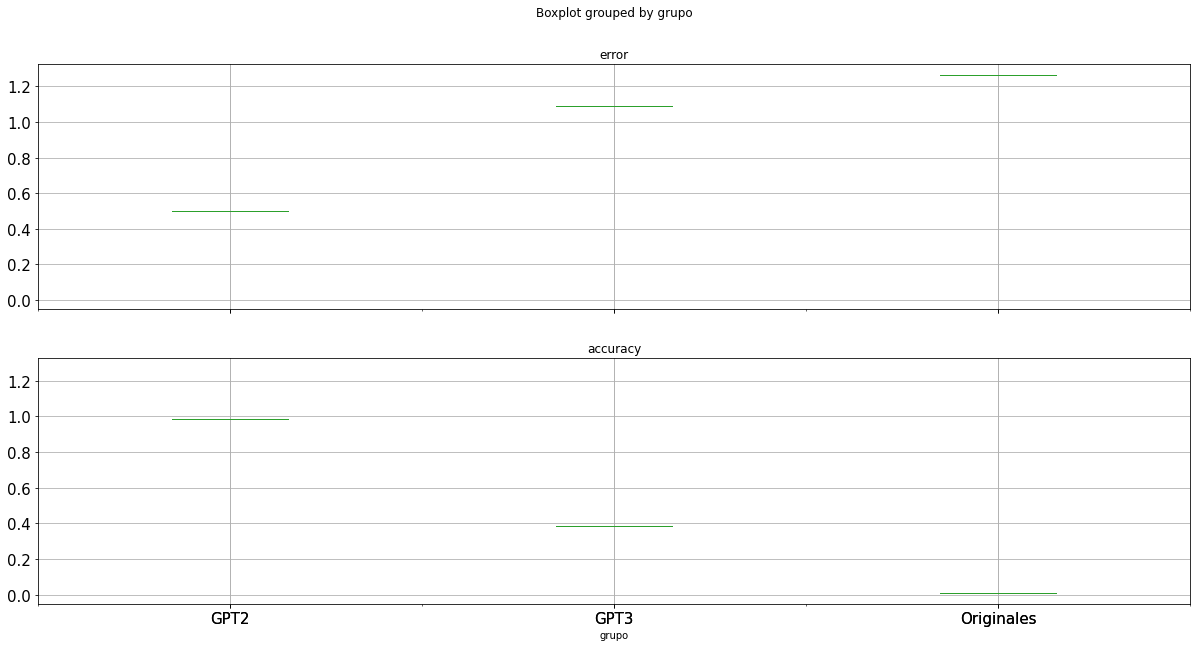

In [10]:
resultados.boxplot(column=['error', 'accuracy'],by='grupo',layout=(2, 1), fontsize=15,figsize=(20,10))
#resultados.boxplot(by='grupo')

<Figure size 720x432 with 0 Axes>

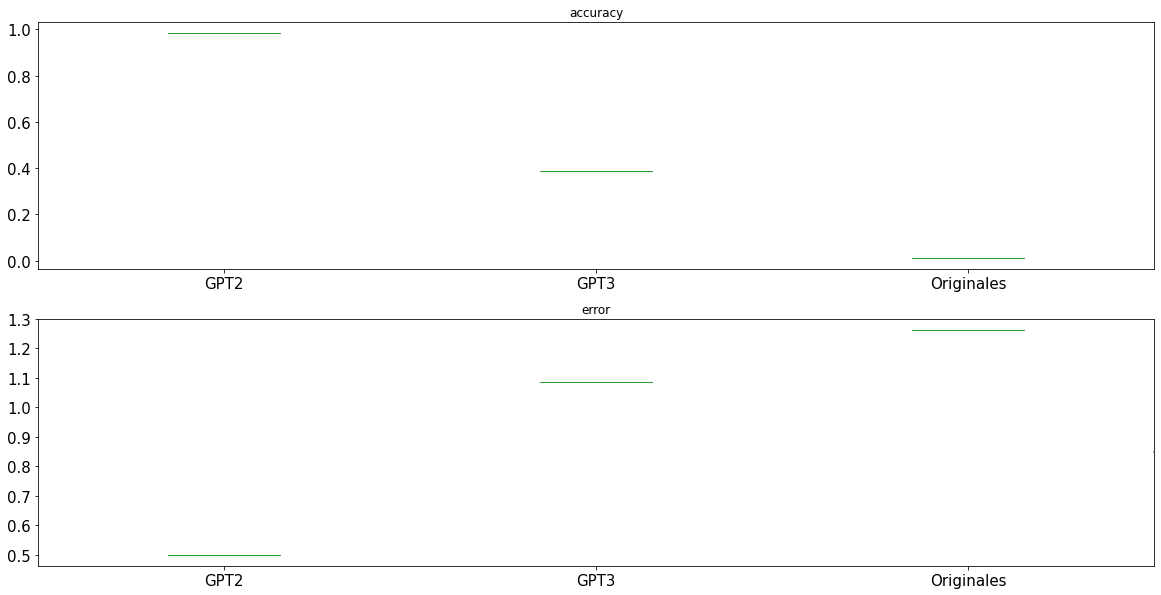

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
resultados.plot(column=['error', 'accuracy'],by='grupo',layout=(2, 1), fontsize=15,figsize=(20,10),subplots=True, 
    sharey=False,kind='box')
plt.axhline(y=0.85073, xmin=1, xmax=100)
plt.subplots_adjust(wspace=0.5)
plt.show()

# Del corpus base vamos a quitar los del test y solo comparar con los de paráfraseo

In [12]:
a=glob.glob('data/gpt3_salida/*.pickle')
a[0]

'data/gpt3_salida/pOriginales.csv.pickle'

In [13]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [14]:
f=pd.read_pickle(a[0])
f

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx
0,0,"[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17582855, 0.0161...","[0.33920893, 0.6571335, 0.0036575892]","[1.0, 0.0, 0.0]",0,3086
1,1,"[NULL{null,ADJ}, woman{woman,NOUN}, running{ru...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.2678...","[0.463231, 0.47502768, 0.06174128]","[1.0, 0.0, 0.0]",0,2022
2,2,"[NULL{null,PROPN}, an{an,DET}, old{old,ADJ}, w...","[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.053287175, 0.170...","[0.3322924, 0.43128973, 0.23641777]","[0.0, 0.0, 1.0]",0,6924
3,3,"[NULL{null,ADJ}, baby{baby,NOUN}, in{in,ADP}, ...","[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.053287175, 0.181...","[0.04414552, 0.5931632, 0.3626913]","[0.0, 0.0, 1.0]",0,1166
4,4,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.1088...","[0.5266996, 0.44589794, 0.027402489]","[0.0, 1.0, 0.0]",0,6791
...,...,...,...,...,...,...,...,...,...,...
168,168,"[NULL{null,PROPN}, a{a,DET}, family{family,NOU...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, an...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.00738...","[0.062560454, 0.41170475, 0.5257348]","[0.0, 1.0, 0.0]",0,2335
169,169,"[NULL{null,ADJ}, fireworks{firework,NOUN}, lig...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1707767, 0.01616...","[0.042563863, 0.46842474, 0.48901135]","[0.0, 1.0, 0.0]",0,3100
170,170,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0984...","[0.099225715, 0.6755099, 0.22526442]","[0.0, 0.0, 1.0]",0,1682
171,171,"[NULL{null,ADJ}, people{people,NOUN}, shopping...","[NULL{null,ADJ}, people{people,NOUN}, shopping...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.16620766, 0.15112576, 0.07738...","[0.6143083, 0.37991437, 0.005777387]","[0.0, 1.0, 0.0]",0,2252


# Procesar todos los archivos para obtener las etiquetas originales y las predicciones

In [15]:
# Procesar los archivos obtenidos para procesarlos y tener un nuevo archivo de las etiquetas originales vs etiquetas de predicción
for e in a:
    df_prediction=pd.read_pickle(e)
    temp=df_prediction.copy()
    df_prediction.assign(predicted_label="")
    df_prediction.assign(gold_label="")
    for index,strings in temp.iterrows():
        p_e=mayorEtiqueta(strings['Prediction'][0],strings['Prediction'][1],strings['Prediction'][2])
        g_e=mayorEtiqueta(strings['Gold_label'][0],strings['Gold_label'][1],strings['Gold_label'][2])
        df_prediction.at[index,'predicted_label']=p_e
        df_prediction.at[index,'gold_label']=g_e
    df_prediction.to_pickle(e)

In [18]:
a

['data/gpt3_salida/pOriginales.csv.pickle',
 'data/gpt3_salida/pparaphraseGPT2.csv.pickle',
 'data/gpt3_salida/pparaphraseGPT3.csv.pickle']

In [20]:
gpt3=pd.read_pickle(a[2])
gpt2=pd.read_pickle(a[1])
originales=pd.read_pickle(a[0])

In [21]:
gpt2

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,PROPN}, a{a,DET}, snowboarder{snowb...","[NULL{null,ADJ}, anowmobile{anowmobile,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.048253484, 0.03528291, 0.0140...","[0.19171262, 0.59036714, 0.21792026]","[0.0, 1.0, 0.0]",1,67,neutral,neutral
1,1,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, a{a,DET}, pretty{pretty,ADV...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.14292027, 0.1716...","[0.30659798, 0.46114457, 0.23225744]","[0.0, 1.0, 0.0]",1,85,neutral,neutral
2,2,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, an...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17077179, 0.12843...","[0.005668939, 0.2836572, 0.71067387]","[0.0, 0.0, 1.0]",1,186,contradiction,contradiction
3,3,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, he{-PRON-,PRON}, is{be,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.17840508, 0.016168319, 0.0352...","[0.43360534, 0.55272824, 0.013666398]","[0.0, 1.0, 0.0]",1,312,neutral,neutral
4,4,"[NULL{null,ADJ}, island{island,NOUN}, native{n...","[NULL{null,PROPN}, they{-PRON-,PRON}, bothmale...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.13479285, 0.13707395, 0.24858...","[0.18923545, 0.36034042, 0.45042413]","[0.0, 0.0, 1.0]",1,330,contradiction,contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...
168,168,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17077179, 0.09413...","[0.019005692, 0.36005315, 0.62094116]","[0.0, 0.0, 1.0]",1,9607,contradiction,contradiction
169,169,"[NULL{null,PROPN}, a{a,DET}, golden{golden,ADJ...","[NULL{null,PROPN}, a{a,DET}, large{large,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.084897816, 0.354...","[0.37810364, 0.39856175, 0.2233346]","[0.0, 1.0, 0.0]",1,9654,neutral,neutral
170,170,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[NULL{null,PROPN}, the{the,DET}, family{family...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1738117, 0.13922...","[0.0057639335, 0.319975, 0.6742611]","[0.0, 0.0, 1.0]",1,9735,contradiction,contradiction
171,171,"[NULL{null,PROPN}, a{a,DET}, white{white,ADJ},...","[NULL{null,ADJ}, theck{theck,NOUN}, kept{keep,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.074927345, 0.101227164, 0.131...","[0.10300125, 0.33359775, 0.563401]","[0.0, 0.0, 1.0]",1,9777,contradiction,contradiction


In [22]:
gpt3

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17582855, 0.1203...","[0.89013404, 0.10697323, 0.0028927538]","[1.0, 0.0, 0.0]",0,3086,entailment,entailment
1,1,"[NULL{null,ADJ}, woman{woman,NOUN}, running{ru...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0161...","[0.9207702, 0.041873954, 0.037355807]","[1.0, 0.0, 0.0]",0,2022,entailment,entailment
2,2,"[NULL{null,PROPN}, an{an,DET}, old{old,ADJ}, w...","[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.053287175, 0.170...","[0.42176342, 0.5005902, 0.0776464]","[0.0, 0.0, 1.0]",0,6924,neutral,contradiction
3,3,"[NULL{null,ADJ}, baby{baby,NOUN}, in{in,ADP}, ...","[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.053287175, 0.181...","[0.04414552, 0.5931632, 0.3626913]","[0.0, 0.0, 1.0]",0,1166,neutral,contradiction
4,4,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0231...","[0.44135818, 0.54986745, 0.008774355]","[0.0, 1.0, 0.0]",0,6791,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
168,168,"[NULL{null,PROPN}, a{a,DET}, family{family,NOU...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, an...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.1707767, 0.00738...","[0.03300249, 0.4524961, 0.51450133]","[0.0, 1.0, 0.0]",0,2335,contradiction,neutral
169,169,"[NULL{null,ADJ}, fireworks{firework,NOUN}, lig...","[NULL{null,PROPN}, the{the,DET}, man{man,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1707767, 0.15689...","[0.064866535, 0.37397125, 0.5611622]","[0.0, 1.0, 0.0]",0,3100,contradiction,neutral
170,170,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17077179, 0.0932...","[0.10142955, 0.65822786, 0.24034254]","[0.0, 0.0, 1.0]",0,1682,neutral,contradiction
171,171,"[NULL{null,ADJ}, people{people,NOUN}, shopping...","[NULL{null,ADJ}, people{people,NOUN}, shop{sho...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.16620766, 0.14710328, 0.07738...","[0.5378429, 0.44849896, 0.013658075]","[0.0, 1.0, 0.0]",0,2252,entailment,neutral


# Vamos a obtener la representación a revisar

In [23]:
for index,strings in gpt2.iterrows():
    if strings["predicted_label"]!=strings["gold_label"]:
        print(index,strings["Idx"],strings["Hipotesis"],strings["predicted_label"],strings["gold_label"])

58 2836 ['NULL{null,PROPN}', 'the{the,DET}', 'two{two,NUM}', 'daughter{daughter,NOUN}', 'are{be,VERB}', 'fighitn{fighitn,NOUN}', '.{.,PUNCT}'] entailment contradiction
102 5840 ['NULL{null,ADJ}', 'aanny{aanny,NOUN}', 'is{be,VERB}', 'pushing{push,VERB}', 'a{a,DET}', 'shopping{shopping,NOUN}', 'cart{cart,NOUN}', '.{.,PUNCT}'] neutral entailment
107 6532 ['NULL{null,PROPN}', 'the{the,DET}', 'two{two,NUM}', 'people{people,NOUN}', 'were{be,VERB}', 'near{near,ADP}', 'the{the,DET}', 'sonomas{sonoma,NOUN}', 'store{store,NOUN}', '.{.,PUNCT}'] contradiction entailment


In [24]:
for index,strings in gpt3.iterrows():
    if strings["predicted_label"]!=strings["gold_label"]:
        print(index,strings["Idx"],strings["Hipotesis"],strings["predicted_label"],strings["gold_label"])

2 6924 ['NULL{null,PROPN}', 'a{a,DET}', 'young{young,ADJ}', 'woman{woman,NOUN}', 'and{and,CCONJ}', 'an{an,DET}', 'elderly{elderly,ADJ}', 'man{man,NOUN}', 'are{be,VERB}', 'engaged{engage,VERB}', 'in{in,ADP}', 'a{a,DET}', 'poker{poker,NOUN}', 'game{game,NOUN}', '.{.,PUNCT}'] neutral contradiction
3 1166 ['NULL{null,PROPN}', 'a{a,DET}', 'young{young,ADJ}', 'boy{boy,NOUN}', 'is{be,VERB}', 'playing{play,VERB}', 'with{with,ADP}', 'a{a,DET}', 'basketball{basketball,NOUN}', '.{.,PUNCT}'] neutral contradiction
5 5290 ['NULL{null,PROPN}', 'the{the,DET}', 'skateboard{skateboard,NOUN}', 'is{be,VERB}', 'equipped{equip,VERB}', 'with{with,ADP}', 'eight{eight,NUM}', 'wheels{wheel,NOUN}', '.{.,PUNCT}'] neutral contradiction
10 9654 ['NULL{null,PROPN}', 'an{an,DET}', 'animal{animal,NOUN}', 'with{with,ADP}', 'golden{golden,ADJ}', 'fur{fur,NOUN}', 'leaps{leap,NOUN}', 'across{across,ADP}', 'a{a,DET}', 'snow{snow,NOUN}', '-{-,PUNCT}', 'covered{cover,VERB}', 'plateau{plateau,NOUN}', '.{.,PUNCT}'] entailment 

In [25]:
grupos=["Originales","GPT2","GPT3"]

# Ya se tiene para todos los muestreos las etiquetas originales vs las predichas

In [26]:
new_data = {'Docs' : [], 'Total' : [], 'Total Entailment' : [], 'Total Entailment (E)' : [],
             'Total Entailment (N)' : [], 'Total Entailment (C)' : [], 'Total Neutral' : [],
             'Total Neutral (N)' : [], 'Total Neutral (E)' : [], 'Total Neutral (C)' : [],
             'Total Contradiction' : [],'Total Contradiction (C)' : [],'Total Contradiction (E)' : [],
             'Total Contradiction (N)' : [], 'grupo': [], 'parafraseo': []}
i=0
for e in a:
    df_prediction=pd.read_pickle(e)    
    c_entailment=df_prediction[(df_prediction['gold_label']=='entailment') & (df_prediction['predicted_label']=='entailment')].shape[0]
    cn_entailment=df_prediction[(df_prediction['gold_label']=='entailment') & (df_prediction['predicted_label']=='neutral')].shape[0]
    cc_entailment=df_prediction[(df_prediction['gold_label']=='entailment') & (df_prediction['predicted_label']=='contradiction')].shape[0]
    t_entailment=df_prediction[df_prediction['gold_label']=='entailment'].shape[0]
    c_neutral=df_prediction[(df_prediction['gold_label']=='neutral') & (df_prediction['predicted_label']=='neutral')].shape[0]
    ce_neutral=df_prediction[(df_prediction['gold_label']=='neutral') & (df_prediction['predicted_label']=='entailment')].shape[0]
    cc_neutral=df_prediction[(df_prediction['gold_label']=='neutral') & (df_prediction['predicted_label']=='contradiction')].shape[0]
    t_neutral=df_prediction[df_prediction['gold_label']=='neutral'].shape[0]
    c_contradiction=df_prediction[(df_prediction['gold_label']=='contradiction') & (df_prediction['predicted_label']=='contradiction')].shape[0]
    ce_contradiction=df_prediction[(df_prediction['gold_label']=='contradiction') & (df_prediction['predicted_label']=='entailment')].shape[0]
    cn_contradiction=df_prediction[(df_prediction['gold_label']=='contradiction') & (df_prediction['predicted_label']=='neutral')].shape[0]
    t_contradiction=df_prediction[df_prediction['gold_label']=='contradiction'].shape[0]
    new_data['Docs'].append(e)
    new_data['Total'].append(df_prediction.shape[0])
    new_data['Total Entailment'].append(t_entailment)
    new_data['Total Entailment (E)'].append(c_entailment)
    new_data['Total Entailment (N)'].append(cn_entailment)
    new_data['Total Entailment (C)'].append(cc_entailment)
    new_data['Total Neutral'].append(t_neutral)
    new_data['Total Neutral (E)'].append(ce_neutral)
    new_data['Total Neutral (N)'].append(c_neutral)
    new_data['Total Neutral (C)'].append(cc_neutral)
    new_data['Total Contradiction'].append(t_contradiction)
    new_data['Total Contradiction (E)'].append(ce_contradiction)
    new_data['Total Contradiction (N)'].append(cn_contradiction)
    new_data['Total Contradiction (C)'].append(c_contradiction)
    new_data['grupo'].append(grupos[i])
    new_data['parafraseo'].append(1)
    i+=1
new_data=pd.DataFrame(new_data)
new_data.to_csv("data/gpt3_salida/predictions/Fresultados.csv")

In [27]:
new_data = pd.read_csv("data/gpt3_salida/predictions/Fresultados.csv")
new_data

,Unnamed: 0,Docs,Total,Total Entailment,Total Entailment (E),Total Entailment (N),Total Entailment (C),Total Neutral,Total Neutral (N),Total Neutral (E),Total Neutral (C),Total Contradiction,Total Contradiction (C),Total Contradiction (E),Total Contradiction (N),grupo,parafraseo
0,0,data/gpt3_salida/pOriginales.csv.pickle,173,40,0,32,8,75,1,50,24,58,1,8,49,Originales,1
1,1,data/gpt3_salida/pparaphraseGPT2.csv.pickle,173,40,38,1,1,75,75,0,0,58,57,1,0,GPT2,1
2,2,data/gpt3_salida/pparaphraseGPT3.csv.pickle,173,40,20,15,5,75,29,31,15,58,18,6,34,GPT3,1


array([[<AxesSubplot:title={'center':'Total'}, xlabel='[grupo, parafraseo]'>,
        <AxesSubplot:title={'center':'Total Entailment'}, xlabel='[grupo, parafraseo]'>],
       [<AxesSubplot:title={'center':'Total Neutral'}, xlabel='[grupo, parafraseo]'>,
        <AxesSubplot:title={'center':'Total Contradiction'}, xlabel='[grupo, parafraseo]'>]],
      dtype=object)

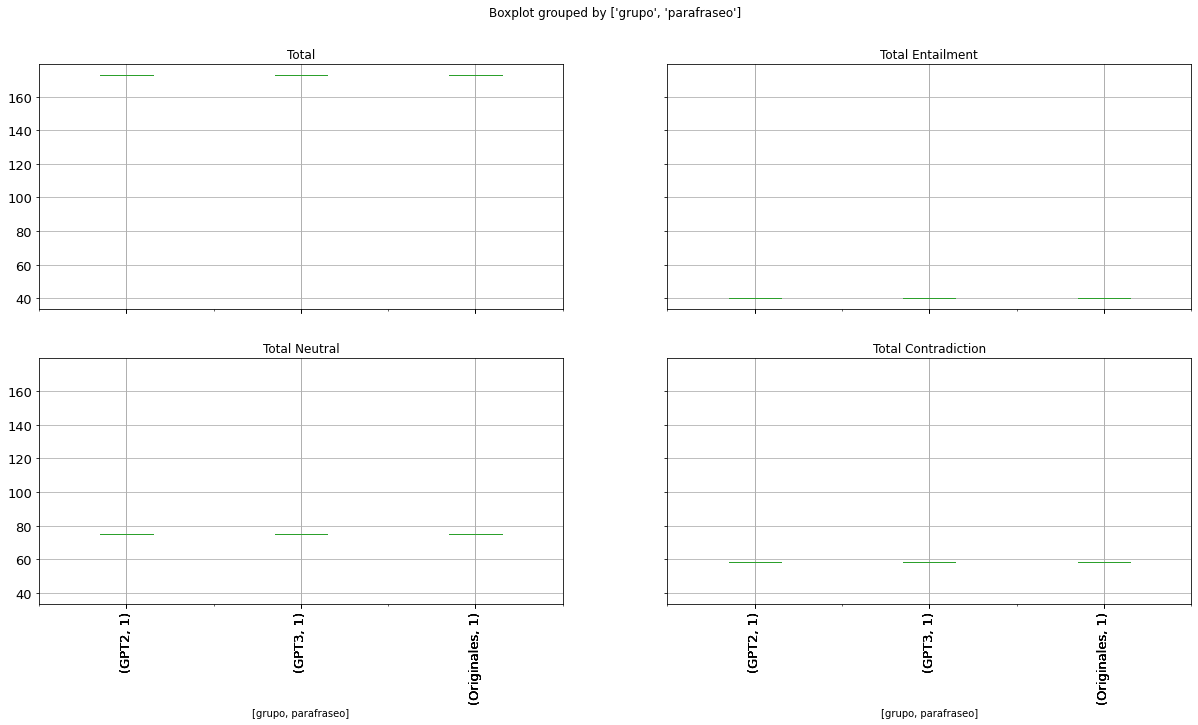

In [28]:
new_data.boxplot(column=['Total', 'Total Entailment','Total Neutral','Total Contradiction'],by=['grupo', 'parafraseo'],fontsize=13,figsize=(20,10),rot=90)
#new_data.boxplot()

array([[<AxesSubplot:title={'center':'Total Entailment'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Entailment (E)'}, xlabel='grupo'>],
       [<AxesSubplot:title={'center':'Total Entailment (N)'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Entailment (C)'}, xlabel='grupo'>]],
      dtype=object)

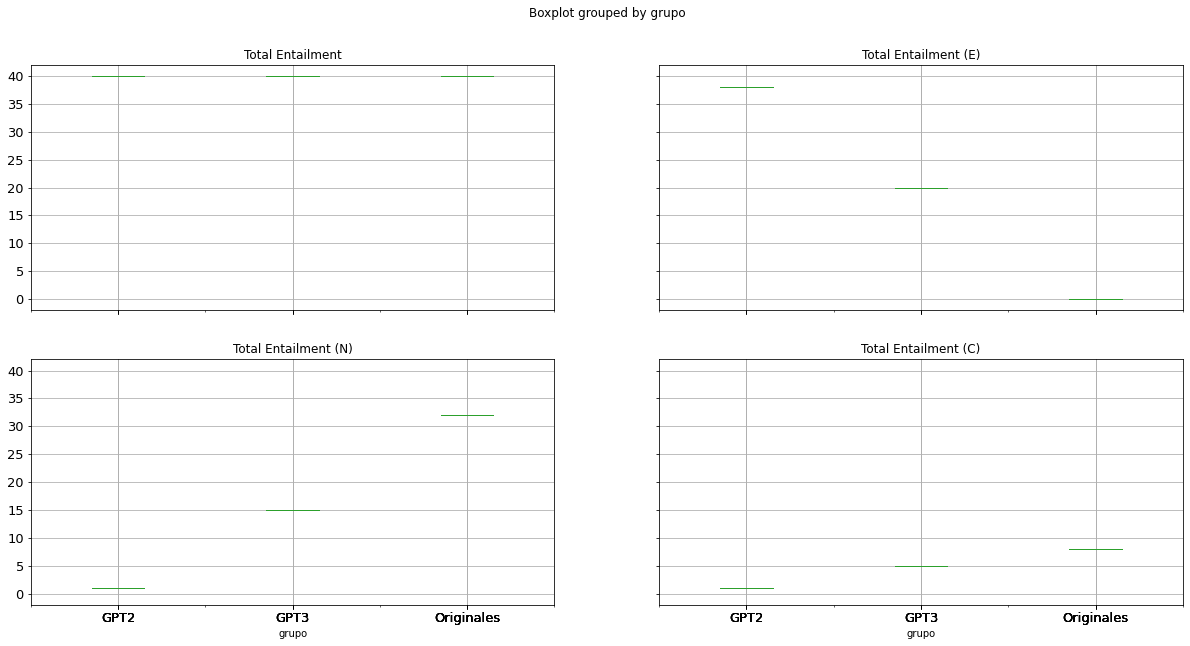

In [29]:
new_data.boxplot(column=['Total Entailment','Total Entailment (E)','Total Entailment (N)','Total Entailment (C)',],by='grupo',fontsize=13,figsize=(20,10))

array([[<AxesSubplot:title={'center':'Total Neutral'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Neutral (N)'}, xlabel='grupo'>],
       [<AxesSubplot:title={'center':'Total Neutral (E)'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Neutral (C)'}, xlabel='grupo'>]],
      dtype=object)

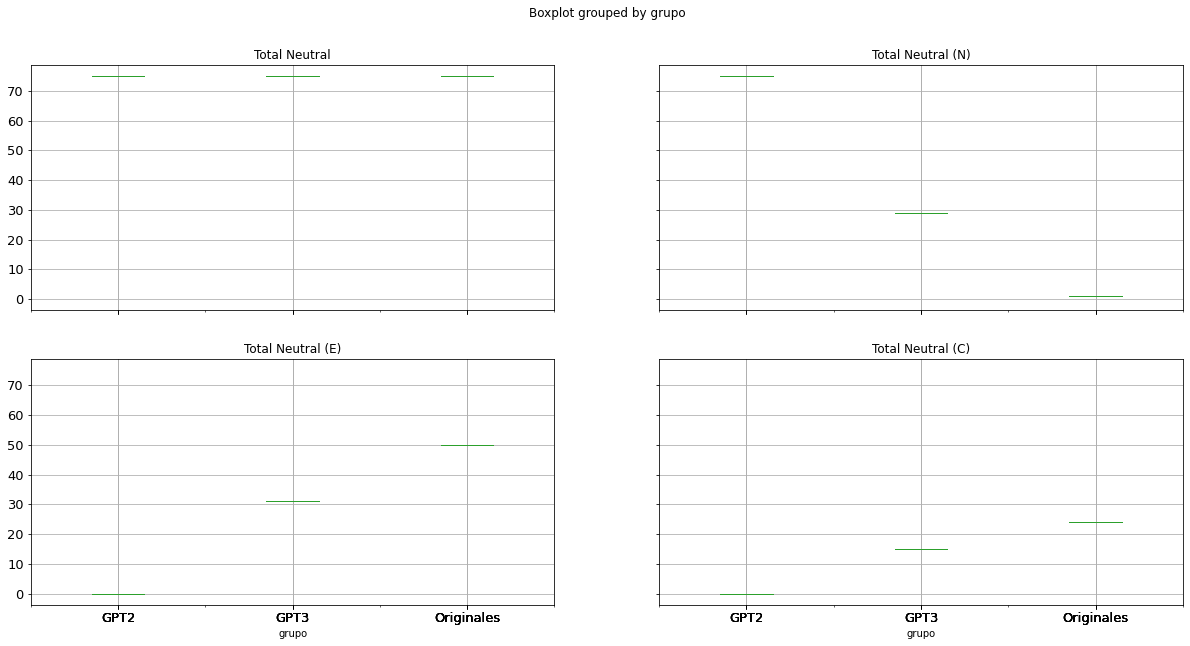

In [30]:
new_data.boxplot(column=['Total Neutral','Total Neutral (N)','Total Neutral (E)','Total Neutral (C)',],by='grupo',fontsize=13,figsize=(20,10))

array([[<AxesSubplot:title={'center':'Total Contradiction'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Contradiction (C)'}, xlabel='grupo'>],
       [<AxesSubplot:title={'center':'Total Contradiction (E)'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Contradiction (N)'}, xlabel='grupo'>]],
      dtype=object)

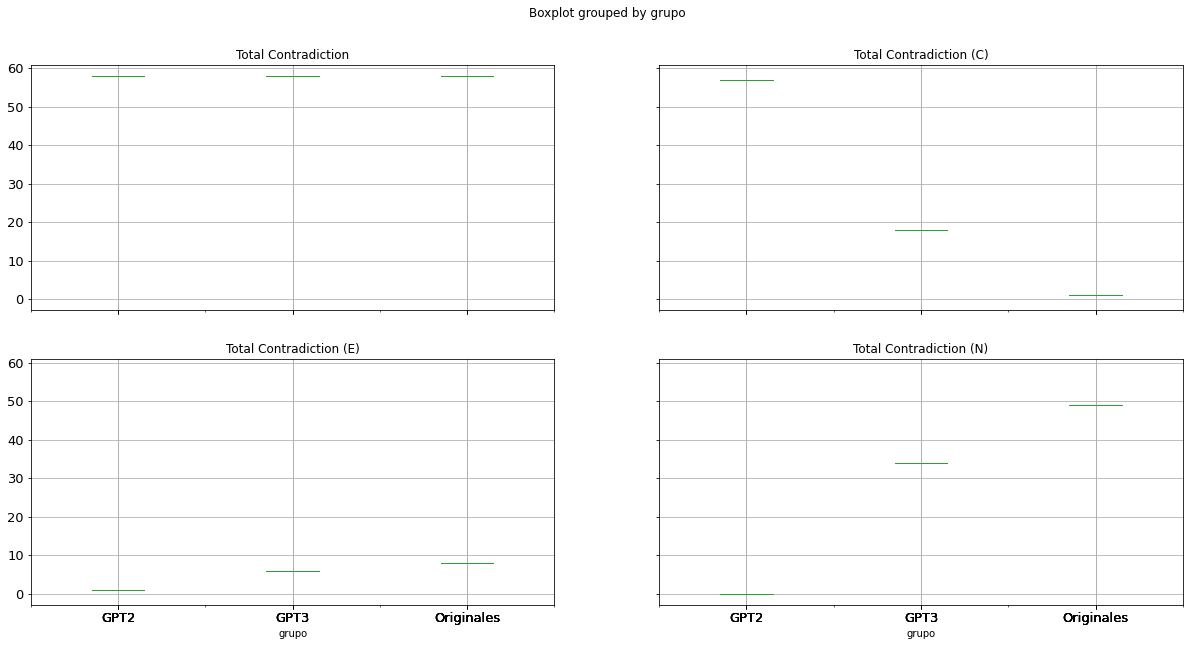

In [31]:
new_data.boxplot(column=['Total Contradiction','Total Contradiction (C)','Total Contradiction (E)','Total Contradiction (N)',],by='grupo',fontsize=13,figsize=(20,10))